<a href="https://colab.research.google.com/github/Pradeepjha88/Cardiac_attack_prediction/blob/master/Hypothesis_testing_Analysis_students_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("student-mat.csv")

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df['Total_Grades'] = df['G1'] + df['G2'] + df['G3']
df['Total_Grades'].describe()

count    395.000000
mean      32.037975
std       11.090357
min        4.000000
25%       25.000000
50%       32.000000
75%       40.000000
max       58.000000
Name: Total_Grades, dtype: float64

In [ ]:
df['traveltime'].value_counts()

1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64

In [ ]:
df_g = df[df['sex'] == 'F']
df_g.shape

(208, 34)

In [ ]:
df_b = df[df['sex'] == 'M']
df_b.shape

(187, 34)

In [ ]:
import seaborn as sb
from matplotlib import pyplot as plt

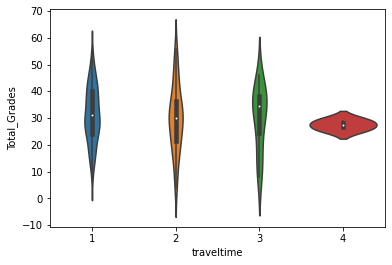

In [ ]:
sb.violinplot(x = "traveltime", y = "Total_Grades", data=df_g)
plt.show()

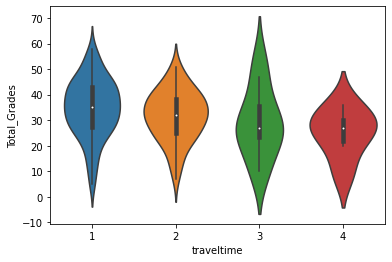

In [ ]:
sb.violinplot(x = "traveltime", y = "Total_Grades", data=df_b)
plt.show()

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(df_g['Total_Grades'], df_b['Total_Grades'], equal_var=False)

Ttest_indResult(statistic=-2.0108259205612837, pvalue=0.04504083323001287)

#### Conclusion:

Because here p-value = 0.045 which is less than 0.05.

We reject the null hypothesis that both groups average value of 'total grades' is same

OR 

We conclude that both groups have different average value of 'total grades'

OR

Conclusion:: Boys and Girls have different average values for total grades.

Ref ::
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind

In [ ]:
ttest_ind(df_g.loc[df_g['traveltime']==1,'Total_Grades'], df_b.loc[df_b['traveltime']==1,'Total_Grades'], equal_var=False)

Ttest_indResult(statistic=-2.344603304428741, pvalue=0.019871790530242364)

In [ ]:
ttest_ind(df_g.loc[df_g['traveltime']==2,'Total_Grades'], df_b.loc[df_b['traveltime']==2,'Total_Grades'], equal_var=False)

Ttest_indResult(statistic=-0.7846158926800821, pvalue=0.4344867032369447)

In [ ]:
ttest_ind(df_g.loc[df_g['traveltime']==3,'Total_Grades'], df_b.loc[df_b['traveltime']==3,'Total_Grades'], equal_var=False)

Ttest_indResult(statistic=0.20425282805943507, pvalue=0.8402217158577179)

In [ ]:
ttest_ind(df_g.loc[df_g['traveltime']==4,'Total_Grades'], df_b.loc[df_b['traveltime']==4,'Total_Grades'], equal_var=False)

Ttest_indResult(statistic=0.6042691353411971, pvalue=0.5679856683012361)

# WRONG t-test

Don't perform t test on CATEGORICAL variables

In [ ]:
ttest_ind(df_g['traveltime'], df_b['traveltime'], equal_var=False)

Ttest_indResult(statistic=-1.1766488493992366, pvalue=0.2400940642446063)

# ANOVA (ANalysis Of VAriance)

## One Way ANOVA

Lets check by using one-way ANOVA test on travel time and total grades

In [ ]:
from scipy import stats

In [ ]:
df['famsize'].unique()

array(['GT3', 'LE3'], dtype=object)

In [ ]:
df['Total_Grades'].describe()

count    395.000000
mean      32.037975
std       11.090357
min        4.000000
25%       25.000000
50%       32.000000
75%       40.000000
max       58.000000
Name: Total_Grades, dtype: float64

In [ ]:
F, p = stats.f_oneway(df.loc[df['famsize']=='GT3','Total_Grades'],
            df.loc[df['famsize']=='LE3','Total_Grades'])

In [ ]:
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=2.697, p=0.101


We see that p-value > 0.05. Hence, we can ACCEPT the Null Hypothesis – there are differences among different family size groups.

# TWO Way ANOVA

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Approach 2 - Check the interaction of groups
formula = 'Total_Grades ~ C(famsize) *C(sex)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Grades   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.767
Date:                Tue, 15 Jun 2021   Prob (F-statistic):             0.0416
Time:                        04:36:45   Log-Likelihood:                -1506.2
No. Observations:                 395   AIC:                             3020.
Df Residuals:                     391   BIC:                             3036.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        30.0705      0.882     34.093      0.000      28.336      31.805
C(famsize)[T.LE3]                 3.6218      1.764      2.053      0.041       0.154       7.090
C(sex)[T.M]                       3.1135      1.322      2.354      0.019       0.513       5.713
C(famsize)[T.LE3]:C(sex)[T.M]    -3.5155      2.458     -1.430      0.153      -8.347       1.316
==============================================================================
Omnibus:                        3.347   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                2.992
Skew:                          -0.136   Prob(JB):                        0.224
Kurtosis:                       2.671   Cond. No.                         6.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

p value of C(famsize)[T.LE3]:C(sex)[T.M]	is 0.153 which is greater than 0.05 so,

we conclude that family size and gender doesn't affect the total results